In [ ]:
# 데이터 불러오기
import pandas as pd
# 상위 폴더로 나가서 data 폴더 접근
df = pd.read_csv('../data/전처리된_데이터.csv')

In [ ]:
# 모델링 및 파이프라인 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 예시: 로지스틱 회귀 파이프라인
pipeline_lr = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # 불균형 처리
    ('model', LogisticRegression())     # 모델
])

In [ ]:
#학습 및 성능 비교 코드 작성 예정

In [ ]:
#최종 모델 저장 
import joblib
import os

# 폴더가 없으면 만드는 안전장치
os.makedirs('../models/ML', exist_ok=True)

# 모델 저장
joblib.dump(best_model, '../models/ML/final_ml_model.pkl')

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
file_path = r"C:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\data\split\Customer_Churn_Dataset_0_impute_label_X_test.csv"
df = pd.read_csv(file_path)

# 2. 불필요한 컬럼 제거 (인덱스 컬럼 등)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 3. 문제지(X)와 정답지(y) 나누기
# target = 'Churn'  # 타겟 컬럼명 확인 필수
# X = df.drop(columns=[target])
# y = df[target]

# 4. 데이터 분할 (Train: 75%, Test: 25%)
# stratify=y 옵션은 이탈 고객의 비율을 유지하며 나누기 위해 필수입니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

# 잘 나뉘었는지 크기 확인
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (5282, 32)
X_test: (1761, 32)


In [25]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=5)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
print("DecsionTree 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")

DecsionTree 정밀도(Precision) - 1기준
Trainset : 0.7125340599455041, Testset: 0.7125748502994012


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree))

---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3880
           1       0.71      0.75      0.73      1402

    accuracy                           0.85      5282
   macro avg       0.81      0.82      0.81      5282
weighted avg       0.86      0.85      0.85      5282



In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1294
           1       0.71      0.76      0.74       467

    accuracy                           0.86      1761
   macro avg       0.81      0.83      0.82      1761
weighted avg       0.86      0.86      0.86      1761



In [29]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# from graphviz import Source
# from metrics import print_regression_metrcis
model = DecisionTreeRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
model.feature_importances_

array([0.        , 0.44184869, 0.09122936, 0.        , 0.        ,
       0.46692195, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

## 랜덤 포레스트


In [31]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# 학습
rfc.fit(X_train, y_train)

## 추론
pred_train_rfc = rfc.predict(X_train)
pred_test_rfc =  rfc.predict(X_test)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[3640,  240],
       [ 473,  929]])

c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


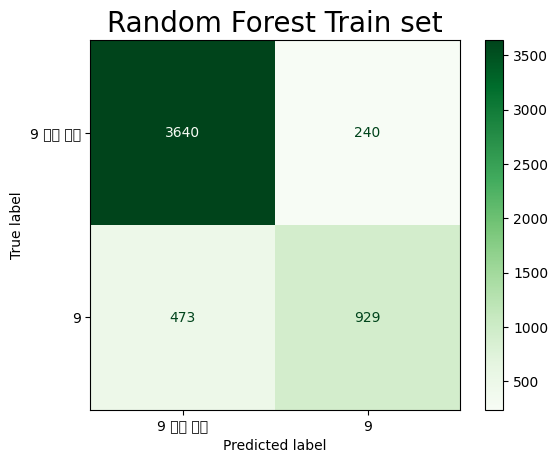

In [34]:
## Confusion Matrix Display
# 시각화 - matplotlib 를 이용해 plotting
### Trainset Confusion Matrix만 시각화.
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm_display2 = ConfusionMatrixDisplay(cm_train_rfc, display_labels=["9 이외 숫자", "9"])
cm_display2.plot(cmap="Greens")

plt.title("Random Forest Train set", fontsize=20)
plt.show()